Zeitreihenanalyse Deutschlands Stromleistung für 2006-2017. Referenz: Open Power System Data (OPSD) (https://open-power-system-data.org/).

Python-Bibliotheken laden

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Daten laden

In [2]:
Energiedaten = pd.read_csv('C:\\Users\\Dell\\Desktop\\Datasets\\Kaggle\\Germany electricity power for 2006-2017\\opsd_germany_daily.csv', index_col = 0, parse_dates = True)

Datumsangaben der Energiedaten 

In [3]:
Energiedaten.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Spalten der Energiedaten in Gigawattstunde Einheiten (GWh)

In [4]:
list(Energiedaten.columns)

['Consumption', 'Wind', 'Solar', 'Wind+Solar']

Übersicht über die letzten zehn Zeilen

In [5]:
Energiedaten.tail(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-22,1423.23782,228.773,10.065,238.838
2017-12-23,1272.17085,748.074,8.450,756.524
2017-12-24,1141.75730,812.422,9.949,822.371
2017-12-25,1111.28338,587.810,15.765,603.575
2017-12-26,1130.11683,717.453,30.923,748.376
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714


statistische Angaben für die Analyse

In [6]:
Energiedaten.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Jahr und Monat hinzufügen

In [7]:
Energiedaten['Year'] = Energiedaten.index.year
Energiedaten['Month'] = Energiedaten.index.month
Energiedaten['Year'] = Energiedaten['Year'].round(0).astype(object)
Energiedaten['Month'] = Energiedaten['Month'].round(0).astype(object)
Energiedaten.sample(10, random_state = 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8
2013-08-08,1291.984,79.666,93.371,173.037,2013,8
2009-08-27,1281.057,NaN,NaN,NaN,2009,8
2015-10-02,1391.050,81.229,160.641,241.870,2015,10
2009-06-02,1201.522,NaN,NaN,NaN,2009,6
2015-02-03,1639.260,97.155,27.530,124.685,2015,2
2012-05-28,988.853,36.311,151.315,187.626,2012,5
2011-07-10,1023.542,22.717,NaN,NaN,2011,7
2006-06-04,955.373,NaN,NaN,NaN,2006,6


Beispiele Grafiken für die Zeitreihenanalyse

Gesamtstromverbrauch in Deutschland von 2006 bis 2017

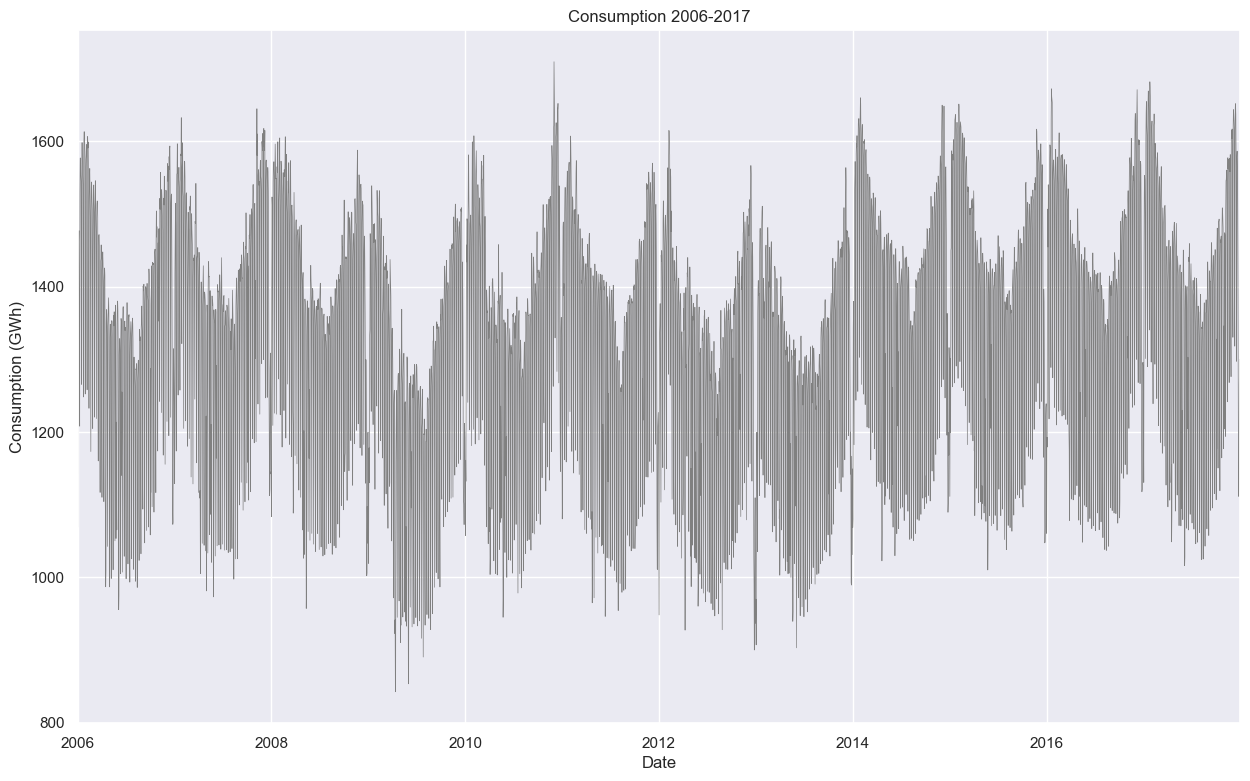

In [8]:
sns.set(rc = {'figure.figsize':(15,9)})
Energiedaten['Consumption'].plot(linewidth = 0.5, color = 'grey', ylabel = 'Consumption (GWh)', title = 'Consumption 2006-2017');

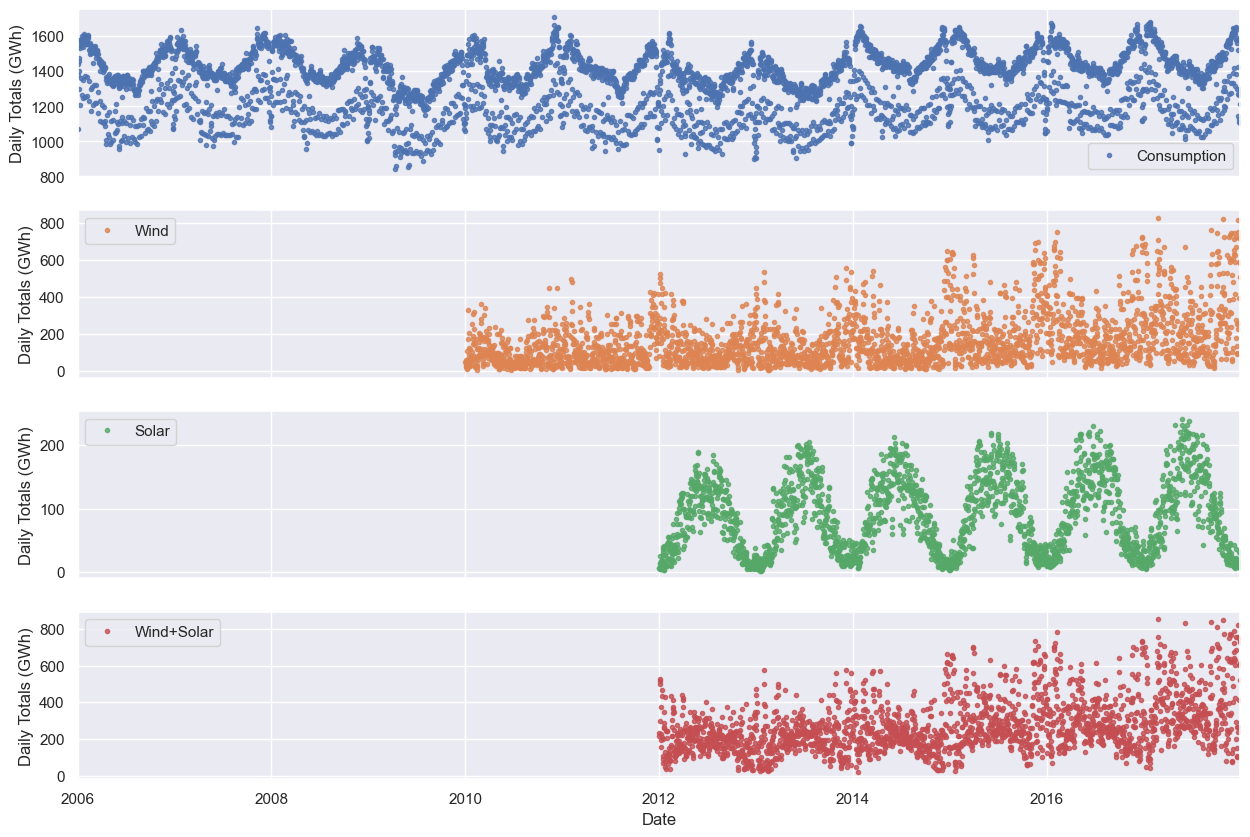

In [9]:
Spalten = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
axes = Energiedaten[Spalten].plot(marker = '.', alpha = 0.8, linestyle = 'none', figsize = (15,10), subplots = True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Es ist auch möglich Visualisierungen der Energiedaten zu verschiedenen Zeitpunkten

Jahr: 2010, Stromverbrauch: Wind

In [10]:
Energiedaten.loc['2010', 'Wind']

Date
2010-01-01     48.709
2010-01-02     24.628
2010-01-03     22.963
2010-01-04     59.318
2010-01-05     41.624
               ...   
2010-12-27     48.360
2010-12-28     52.291
2010-12-29     19.869
2010-12-30     15.745
2010-12-31    117.325
Name: Wind, Length: 365, dtype: float64

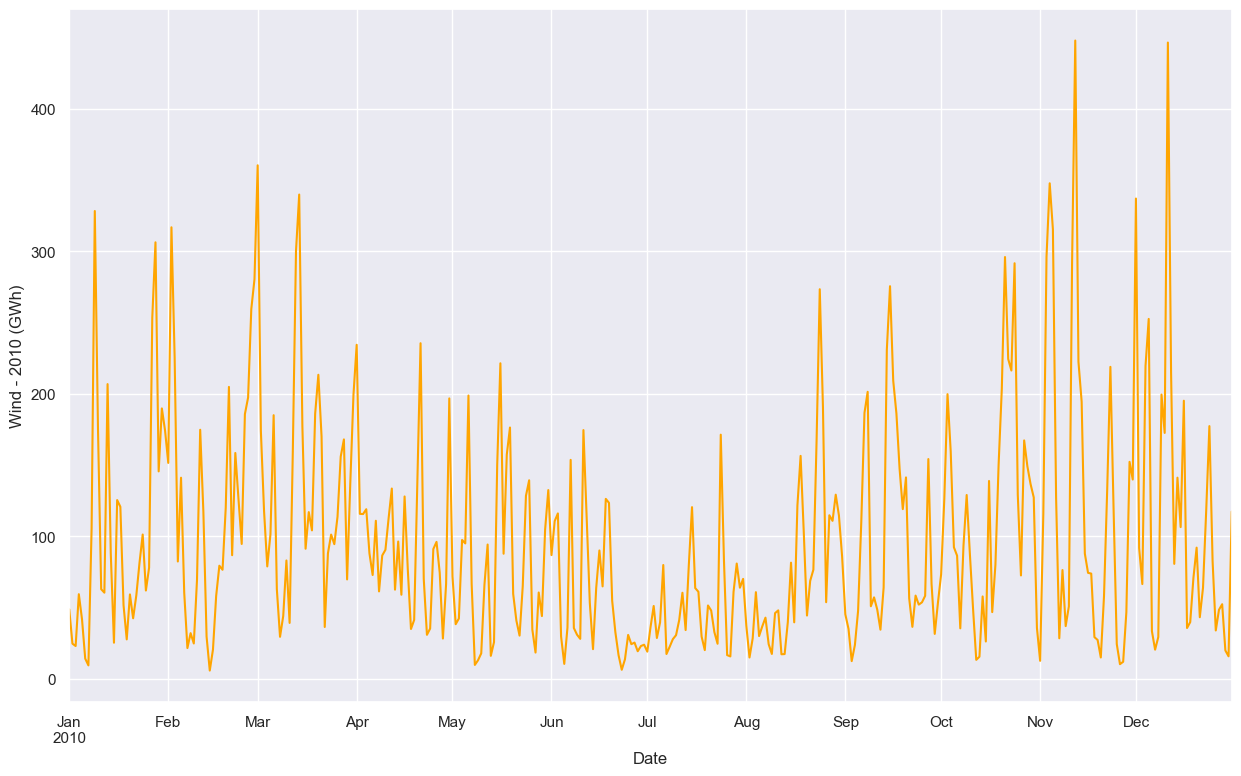

In [11]:
ax = Energiedaten.loc['2010', 'Wind'].plot(linewidth = 1.5, linestyle = '-', color = 'orange')
ax.set_ylabel('Wind - 2010 (GWh)');

Jahr: 2014, Gesamtstromverbrauch

In [12]:
Energiedaten.loc['2014', 'Consumption']

Date
2014-01-01    1080.080
2014-01-02    1343.101
2014-01-03    1379.776
2014-01-04    1271.029
2014-01-05    1182.416
                ...   
2014-12-27    1198.834
2014-12-28    1168.079
2014-12-29    1316.093
2014-12-30    1300.367
2014-12-31    1183.510
Name: Consumption, Length: 365, dtype: float64

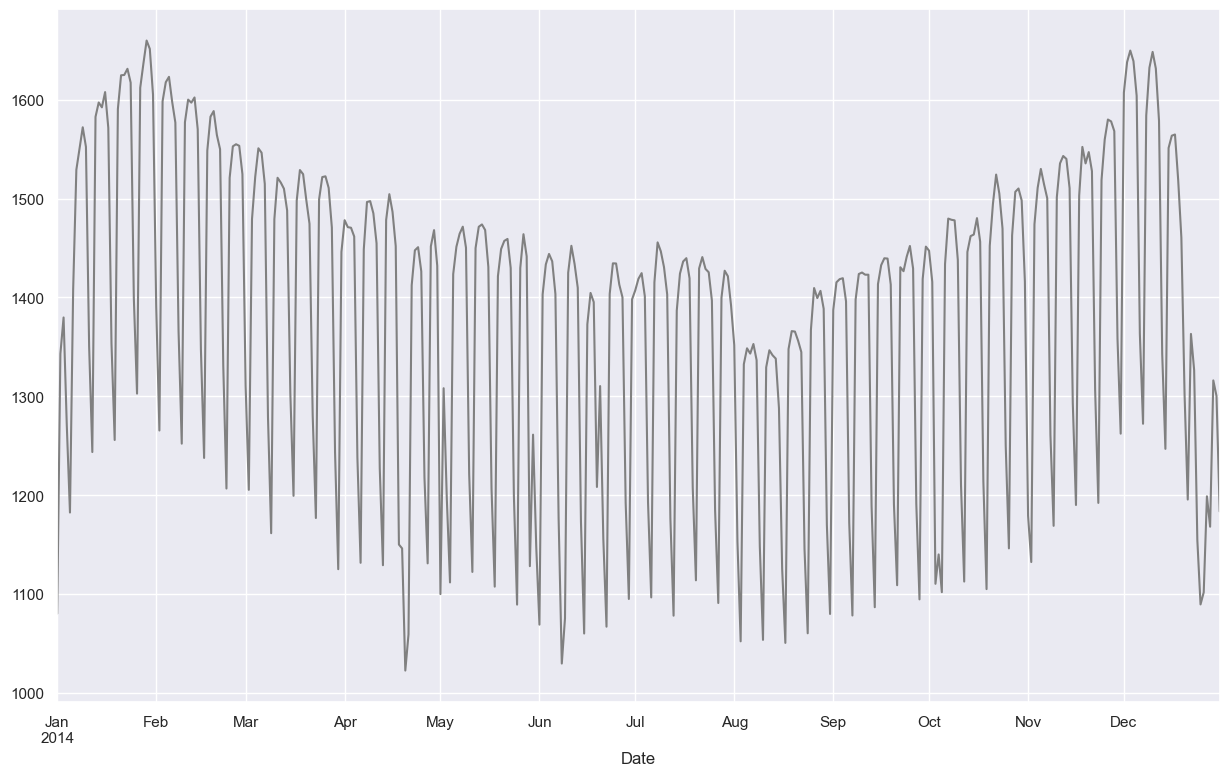

In [13]:
x = Energiedaten.loc['2014', 'Consumption'].plot(linewidth = 1.5, linestyle = '-', color = 'grey')
ax.set_ylabel('Consumption - 2014 (GWh)');

Jahr: 2015, Monat: August

In [14]:
Energiedaten.loc['2015-08']

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2015-08-01,1123.809,61.181,157.698,218.879,2015,8
2015-08-02,1038.046,46.869,183.837,230.706,2015,8
2015-08-03,1353.912,127.868,203.412,331.280,2015,8
2015-08-04,1385.440,162.887,139.899,302.786,2015,8
2015-08-05,1368.478,68.686,194.808,263.494,2015,8
2015-08-06,1389.743,94.690,190.600,285.290,2015,8
2015-08-07,1363.039,73.113,176.365,249.478,2015,8
2015-08-08,1162.867,126.431,157.084,283.515,2015,8
2015-08-09,1071.309,70.336,171.801,242.137,2015,8


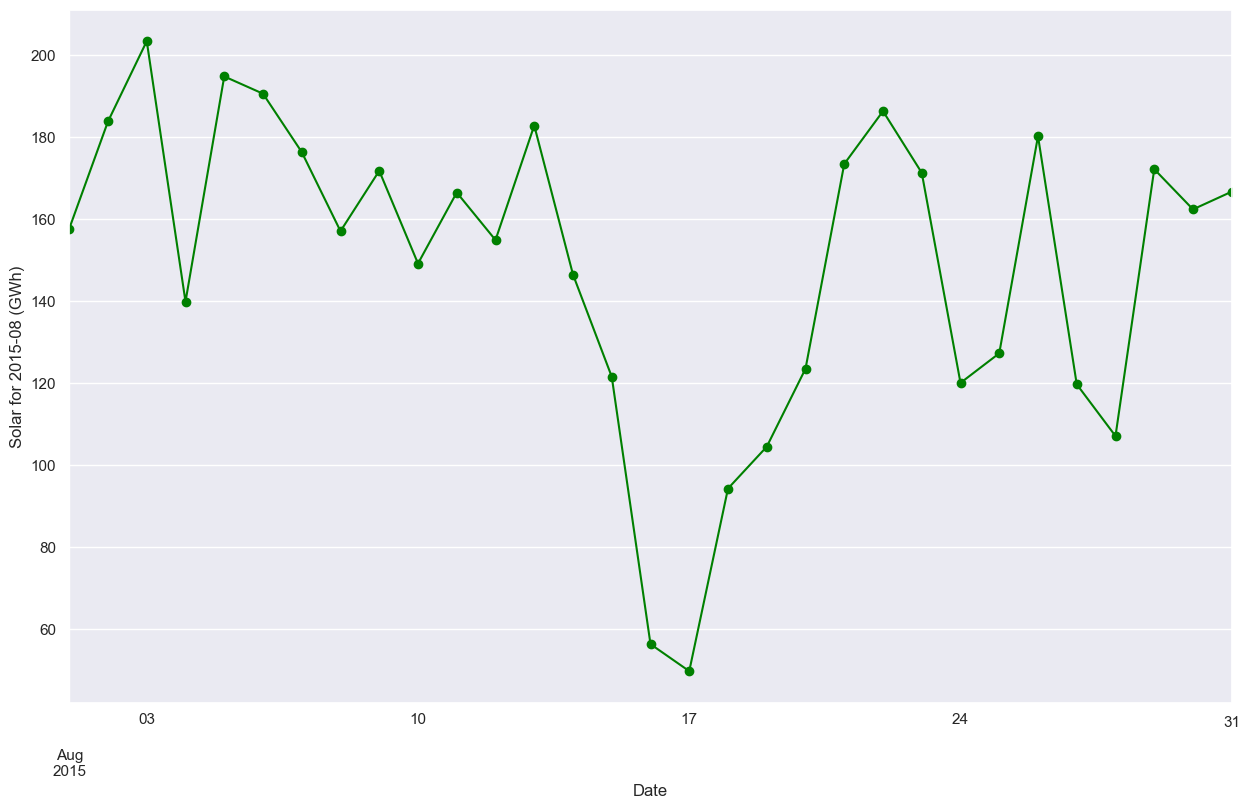

In [15]:
ax = Energiedaten.loc['2015-08', 'Solar'].plot(linewidth = 1.5, linestyle = '-', marker = 'o', color = 'green')
ax.set_ylabel('Solar for 2015-08 (GWh)');

Intervall: vom 2016-12-24 bis zum 2017-01-08

In [16]:
Energiedaten.loc['2016-12-24':'2017-01-08']

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2016-12-24,1195.354,681.509,12.843,694.352,2016,12
2016-12-25,1117.673,719.778,6.608,726.386,2016,12
2016-12-26,1121.213,718.160,15.463,733.623,2016,12
2016-12-27,1289.324,640.895,23.448,664.343,2016,12
2016-12-28,1294.881,214.990,19.450,234.440,2016,12
2016-12-29,1295.897,167.698,42.910,210.608,2016,12
2016-12-30,1291.044,239.257,48.546,287.803,2016,12
2016-12-31,1212.568,315.063,34.580,349.643,2016,12
2017-01-01,1130.413,307.125,35.291,342.416,2017,1


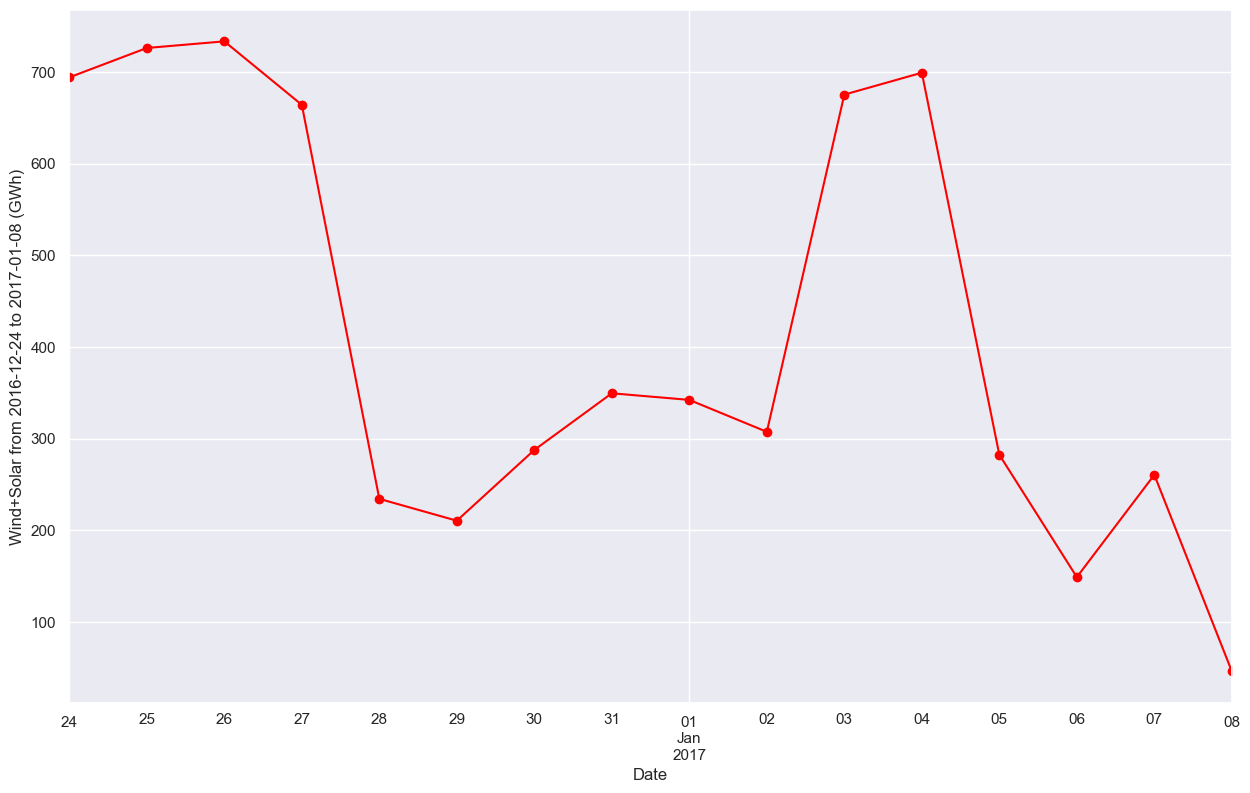

In [17]:
ax = Energiedaten.loc['2016-12-24':'2017-01-08', 'Wind+Solar'].plot(linewidth = 1.5, linestyle = '-', marker = 'o', color = 'red')
ax.set_ylabel('Wind+Solar from 2016-12-24 to 2017-01-08 (GWh)');